**CUSTOMER CHURN**

**Capstone Project Notes 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.25.2
Pandas Version 2.0.3
Seaborn Version 0.13.1
Matplotlib Version 3.7.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Customer Churn Data.csv')

In [5]:
df.head(11)

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY           Payment  \
0       20000      1      4        3.0              6.0        Debit Card   
1       20001      1      0        1.0              8.0               UPI   
2       20002      1      0        1.0             30.0        Debit Card   
3       20003      1      0        3.0             15.0        Debit Card   
4       20004      1      0        1.0             12.0       Credit Card   
5       20005      1      0        1.0             22.0        Debit Card   
6       20006      1      2        3.0             11.0  Cash on Delivery   
7       20007      1      0        1.0              6.0       Credit Card   
8       20008      1     13        3.0              9.0          E wallet   
9       20009      1      0        1.0             31.0        Debit Card   
10      20010      1      4        NaN             18.0  Cash on Delivery   

    Gender  Service_Score Account_user_count account_segment  CC_Agent_Score  \
0   Female            3.0                  3           Super             2.0   
1     Male            3.0                  4    Regular Plus             3.0   
2     Male            2.0                  4    Regular Plus             3.0   
3     Male            2.0                  4           Super             5.0   
4     Male            2.0                  3    Regular Plus             5.0   
5   Female            3.0                NaN    Regular Plus             5.0   
6     Male            2.0                  3           Super             2.0   
7     Male            3.0                  3    Regular Plus             2.0   
8     Male            2.0                  4    Regular Plus             3.0   
9     Male            2.0                  5    Regular Plus             3.0   
10       F            2.0                  3         Regular             3.0   

   Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0          Single             9          1.0             11   
1          Single             7          1.0             15   
2          Single             6          1.0             14   
3          Single             8          0.0             23   
4          Single             3          0.0             11   
5          Single             2          1.0             22   
6        Divorced             4          0.0             14   
7        Divorced             3          1.0             16   
8        Divorced             2          1.0             14   
9          Single             2          0.0             12   
10       Divorced             2          0.0             12   

   coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                        1                    5      160       Mobile  
1                        0                    0      121       Mobile  
2                        0                    3      NaN       Mobile  
3                        0                    3      134       Mobile  
4                        1                    3      130       Mobile  
5                        4                    7      139     Computer  
6                        0                    0      121       Mobile  
7                        2                    0      123       Mobile  
8                        0                    2      127       Mobile  
9                        1                    1      123       Mobile  
10                       9                    8      295       Mobile

In [6]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

AccountID         Churn Tenure     City_Tier  CC_Contacted_LY  \
count   11260.00000  11260.000000  11158  11148.000000     11158.000000   
unique          NaN           NaN     38           NaN              NaN   
top             NaN           NaN      1           NaN              NaN   
freq            NaN           NaN   1351           NaN              NaN   
mean    25629.50000      0.168384    NaN      1.653929        17.867091   
std      3250.62635      0.374223    NaN      0.915015         8.853269   
min     20000.00000      0.000000    NaN      1.000000         4.000000   
25%     22814.75000      0.000000    NaN      1.000000        11.000000   
50%     25629.50000      0.000000    NaN      1.000000        16.000000   
75%     28444.25000      0.000000    NaN      3.000000        23.000000   
max     31259.00000      1.000000    NaN      3.000000       132.000000   

           Payment Gender  Service_Score Account_user_count account_segment  \
count        11151  11152   11162.000000              11148           11163   
unique           5      4            NaN                  7               7   
top     Debit Card   Male            NaN                  4           Super   
freq          4587   6328            NaN               4569            4062   
mean           NaN    NaN       2.902526                NaN             NaN   
std            NaN    NaN       0.725584                NaN             NaN   
min            NaN    NaN       0.000000                NaN             NaN   
25%            NaN    NaN       2.000000                NaN             NaN   
50%            NaN    NaN       3.000000                NaN             NaN   
75%            NaN    NaN       3.000000                NaN             NaN   
max            NaN    NaN       5.000000                NaN             NaN   

        CC_Agent_Score Marital_Status rev_per_month   Complain_ly  \
count     11144.000000          11048         11158  10903.000000   
unique             NaN              3            59           NaN   
top                NaN        Married             3           NaN   
freq               NaN           5860          1746           NaN   
mean          3.066493            NaN           NaN      0.285334   
std           1.379772            NaN           NaN      0.451594   
min           1.000000            NaN           NaN      0.000000   
25%           2.000000            NaN           NaN      0.000000   
50%           3.000000            NaN           NaN      0.000000   
75%           4.000000            NaN           NaN      1.000000   
max           5.000000            NaN           NaN      1.000000   

       rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
count           11260                   11260                10903    10789   
unique             20                      20                   24      321   
top                14                       1                    3      152   
freq             1524                    4373                 1816      208   
mean              NaN                     NaN                  NaN      NaN   
std               NaN                     NaN                  NaN      NaN   
min               NaN                     NaN                  NaN      NaN   
25%               NaN                     NaN                  NaN      NaN   
50%               NaN                     NaN                  NaN      NaN   
75%               NaN                     NaN                  NaN      NaN   
max               NaN                     NaN                  NaN      NaN   

       Login_device  
count         11039  
unique            3  
top          Mobile  
freq           7482  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

In [7]:
# List of junk values to be replaced with NaN
junk_values = ['#', '$', '+']

# Replacing junk values with NaN
df.replace(junk_values, np.nan, inplace=True)

In [8]:
# Converting object-type numerical columns to numeric
num_cols_to_convert = ['Tenure', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
for col in num_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [9]:
# Handling missing values

# Filling missing numerical values with the median
num_columns = df.select_dtypes(include=[np.number]).columns
for col in num_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Filling missing categorical values with the mode
cat_columns = df.select_dtypes(include=[object]).columns
for col in cat_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verifying data cleaning
missing_values = df.isnull().sum()
missing_values


AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [10]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Summary statistics for numeric columns
numeric_summary = df.describe()
print(numeric_summary)


Number of rows: 11260
Number of columns: 19
         AccountID         Churn        Tenure     City_Tier  CC_Contacted_LY  \
count  11260.00000  11260.000000  11260.000000  11260.000000     11260.000000   
mean   25629.50000      0.168384     10.985879      1.647425        17.850178   
std     3250.62635      0.374223     12.757534      0.912763         8.814851   
min    20000.00000      0.000000      0.000000      1.000000         4.000000   
25%    22814.75000      0.000000      2.000000      1.000000        11.000000   
50%    25629.50000      0.000000      9.000000      1.000000        16.000000   
75%    28444.25000      0.000000     16.000000      3.000000        23.000000   
max    31259.00000      1.000000     99.000000      3.000000       132.000000   

       Service_Score  Account_user_count  CC_Agent_Score  rev_per_month  \
count   11260.000000        11260.000000    11260.000000   11260.000000   
mean        2.903375            3.704973        3.065808       6.266874   
s

In [11]:
# Unique values and frequencies for categorical columns
categorical_columns = ['City_Tier', 'Payment', 'Gender', 'Marital_Status', 'account_segment', 'Login_device']
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()


Column: City_Tier
City_Tier
1.0    7375
3.0    3405
2.0     480
Name: count, dtype: int64

Column: Payment
Payment
Debit Card          4696
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64

Column: Gender
Gender
Male      6436
Female    4178
M          376
F          270
Name: count, dtype: int64

Column: Marital_Status
Marital_Status
Married     6072
Single      3520
Divorced    1668
Name: count, dtype: int64

Column: account_segment
account_segment
Super           4159
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64

Column: Login_device
Login_device
Mobile      7703
Computer    3018
&&&&         539
Name: count, dtype: int64



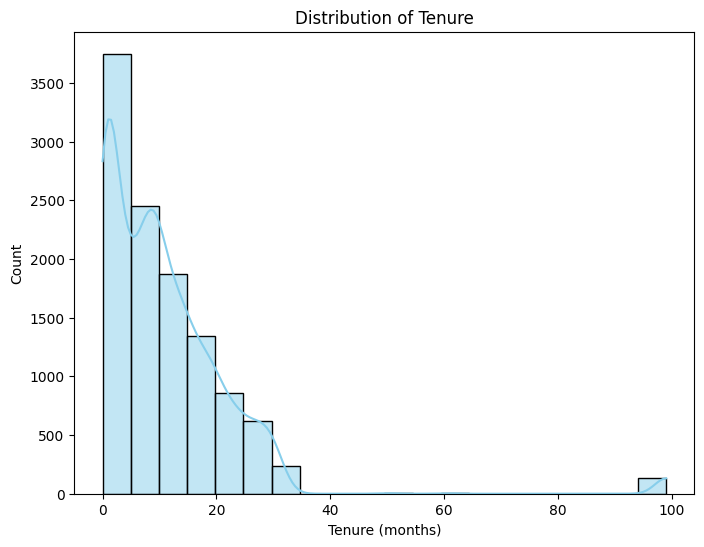

<ipython-input-12-5f789dd91695>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Service_Score', data=df, palette='Set3')


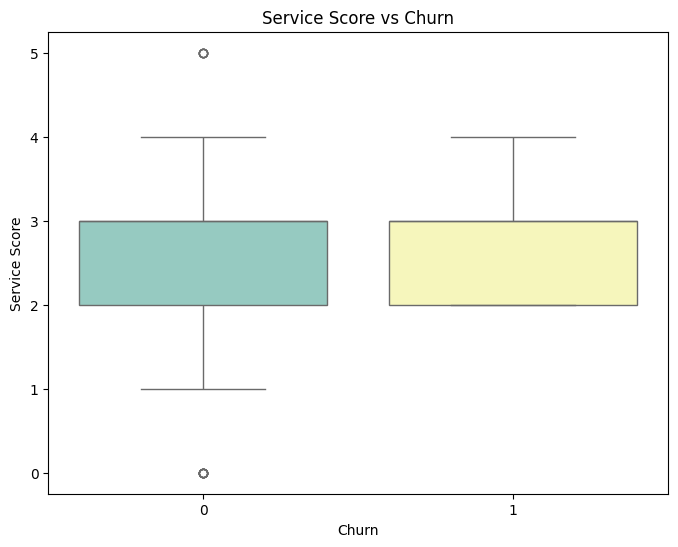

In [12]:
#Univariate Analysis
  #Continuous attributes

import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for Tenure
plt.figure(figsize=(8, 6))
sns.histplot(df['Tenure'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

# Example: Box plot for Service_Score
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Service_Score', data=df, palette='Set3')
plt.title('Service Score vs Churn')
plt.xlabel('Churn')
plt.ylabel('Service Score')
plt.show()


<ipython-input-13-337226c14a24>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=df, palette='bright')


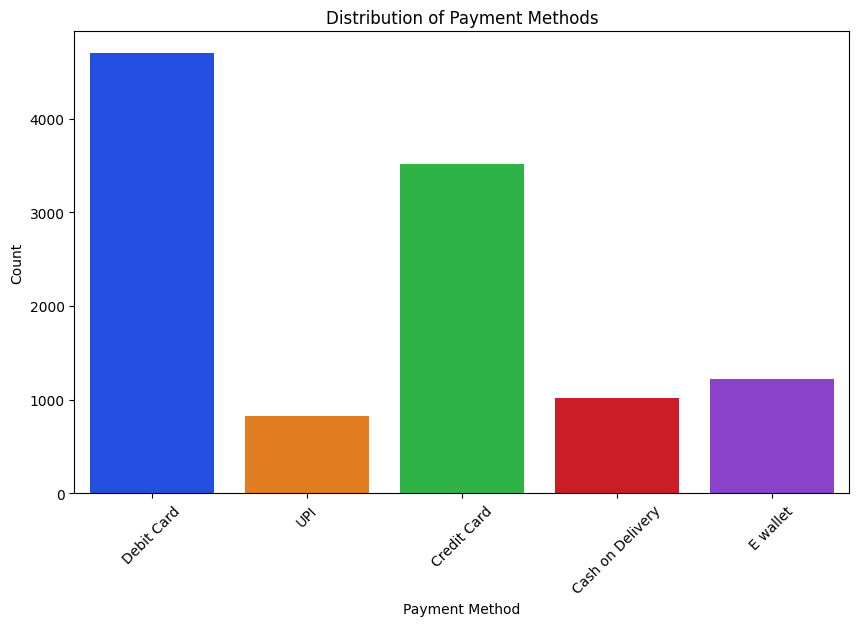

In [13]:
#Categorical attributes

# Example: Bar plot for Payment
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=df, palette='bright')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


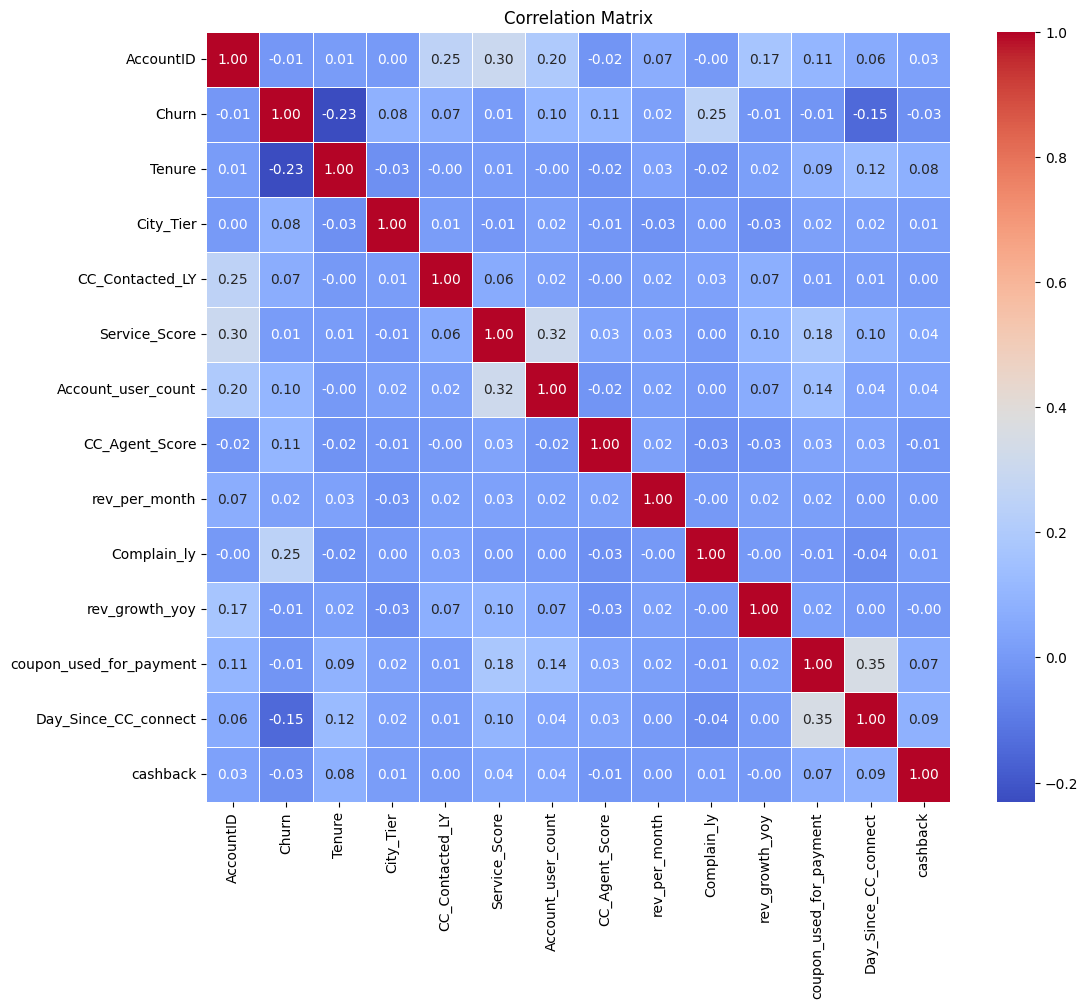

In [14]:
#Bivariate Analysis

# Excluding non-numeric columns from correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-15-18bd09db8ff5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='account_segment', y='Service_Score', data=df, palette='Set3')


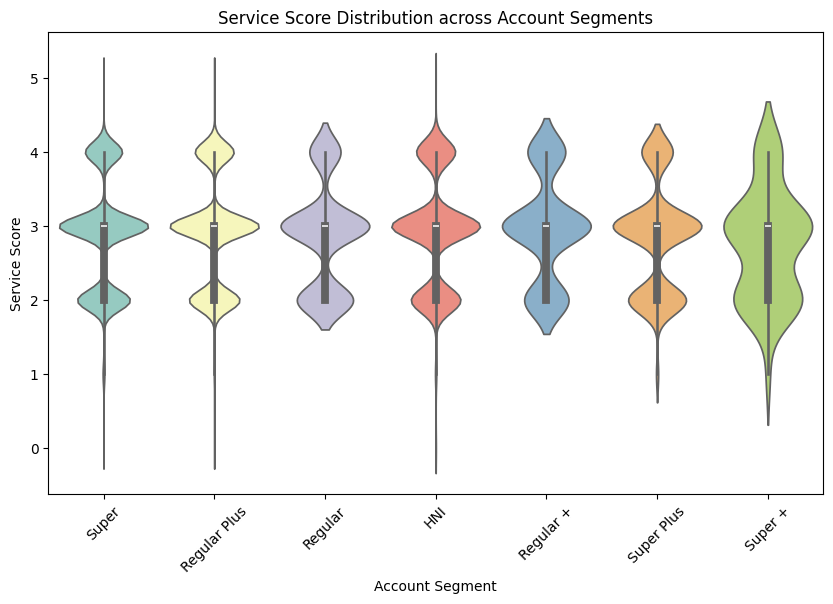

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='account_segment', y='Service_Score', data=df, palette='Set3')
plt.title('Service Score Distribution across Account Segments')
plt.xlabel('Account Segment')
plt.ylabel('Service Score')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Identifying unnecessary variables
unwanted_columns = ['AccountID', 'Login_device']

# Removing unwanted columns
df_cleaned = df.drop(columns=unwanted_columns, axis=1)


In [17]:
# Simply dropping the Na values is making me lose 26% of data

# df_cleaned = df.dropna()

# Count rows before and after dropping NaNs
# rows_before = df.shape[0]
# rows_after = df_cleaned.shape[0]
# rows_dropped = rows_before - rows_after


# print(f"Number of rows before dropping NaNs: {rows_before}")
# print(f"Number of rows after dropping NaNs: {rows_after}")
# print(f"Number of rows dropped due to NaNs: {rows_dropped}")

# Number of rows before dropping NaNs: 11260
# Number of rows after dropping NaNs: 8250
# Number of rows dropped due to NaNs: 3010

In [18]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values (if any)
print(missing_values[missing_values > 0])


Series([], dtype: int64)


<ipython-input-19-3be51a90f1b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Service_Score', data=df_cleaned, palette='Set3')


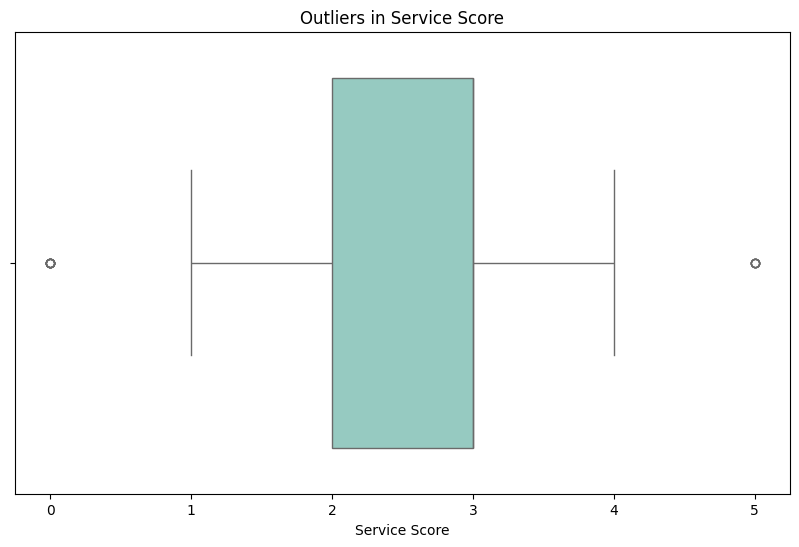

In [19]:
# Visualising outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Service_Score', data=df_cleaned, palette='Set3')
plt.title('Outliers in Service Score')
plt.xlabel('Service Score')
plt.show()

# Removing outliers based on interquartile range (IQR)
Q1 = df_cleaned['Service_Score'].quantile(0.25)
Q3 = df_cleaned['Service_Score'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_cleaned = df_cleaned[(df_cleaned['Service_Score'] >= Q1 - 1.5 * IQR) & (df_cleaned['Service_Score'] <= Q3 + 1.5 * IQR)]


<ipython-input-20-aa13dcdd1836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
<ipython-input-20-aa13dcdd1836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
<ipython-input-20-aa13dcdd1836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='Set3')
<ipython-input-20-aa13dcdd1836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns

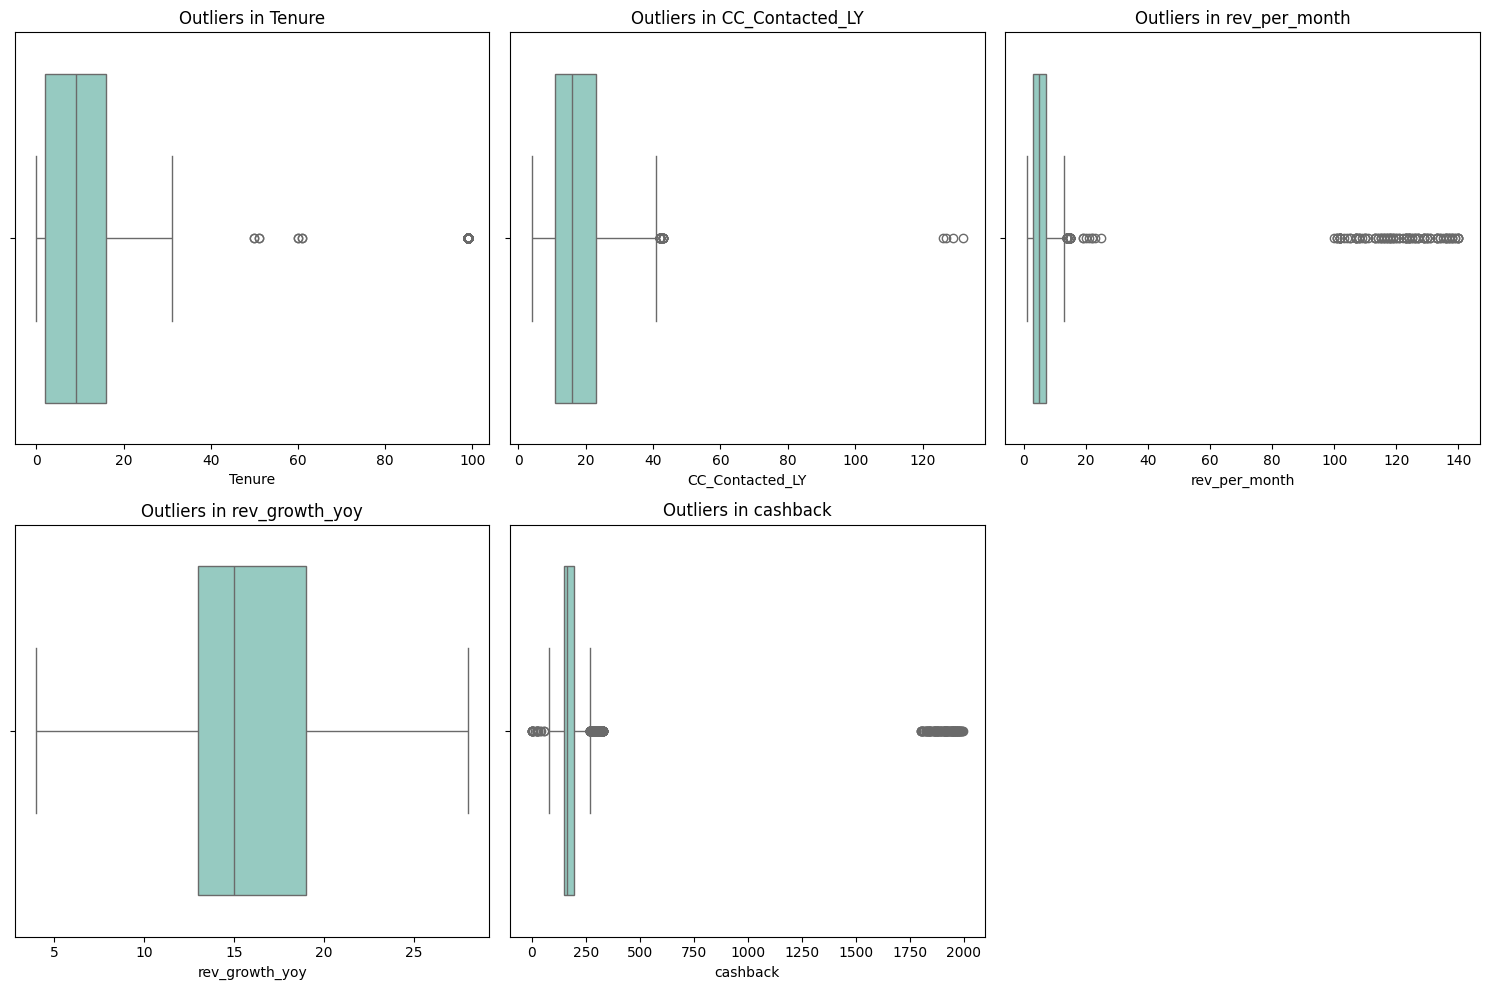

In [20]:

# Visualizing outliers in other numeric columns
numeric_columns = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'cashback']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], palette='Set3')
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [21]:
# Calculating IQR for each numeric column
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers based on IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")


Outliers in Tenure: 139
Outliers in CC_Contacted_LY: 42
Outliers in rev_per_month: 185
Outliers in rev_growth_yoy: 0
Outliers in cashback: 997


In [22]:
# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)

# Calculating the Interquartile Range (IQR)
IQR = Q3 - Q1

# Defining the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Printing the bounds
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')


Lower Bound: -19.0
Upper Bound: 37.0


In [23]:
# Capping the outliers
df['Tenure'] = df['Tenure'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

print(df['Tenure'].describe())


count    11260.000000
mean        10.251421
std          8.888905
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: Tenure, dtype: float64


In [24]:
# Defining a function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    print(f'{column}: Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    return df

# Columns with outliers
columns_with_outliers = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'cashback']

# Applying the function to each column
for column in columns_with_outliers:
    df = cap_outliers(df, column)

# Checking the result for each column
for column in columns_with_outliers:
    print(f'{column} after capping outliers:')
    print(df[column].describe())
    print()


Tenure: Lower Bound: -19.0, Upper Bound: 37.0
CC_Contacted_LY: Lower Bound: -7.0, Upper Bound: 41.0
rev_per_month: Lower Bound: -3.0, Upper Bound: 13.0
cashback: Lower Bound: 74.5, Upper Bound: 270.5
Tenure after capping outliers:
count    11260.000000
mean        10.251421
std          8.888905
min          0.000000
25%          2.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: Tenure, dtype: float64

CC_Contacted_LY after capping outliers:
count    11260.000000
mean        17.815009
std          8.564140
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max         41.000000
Name: CC_Contacted_LY, dtype: float64

rev_per_month after capping outliers:
count    11260.000000
mean         5.250799
std          2.879616
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         13.000000
Name: rev_per_month, dtype: float64

cashback after capping outliers:
count    11260.000000
me

In [25]:
# Dropping unwanted columns
unwanted_columns = ['AccountID', 'Login_device']
df_cleaned = df.drop(columns=unwanted_columns)


In [39]:
# Creating a new feature
df['Total_Interaction'] = df['CC_Contacted_LY'] + df['Day_Since_CC_connect']


In [27]:
# checking for imbalance in Data

class_distribution = df['Churn'].value_counts()
print(class_distribution)


Churn
0    9364
1    1896
Name: count, dtype: int64


<ipython-input-28-6eabee9bdd38>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


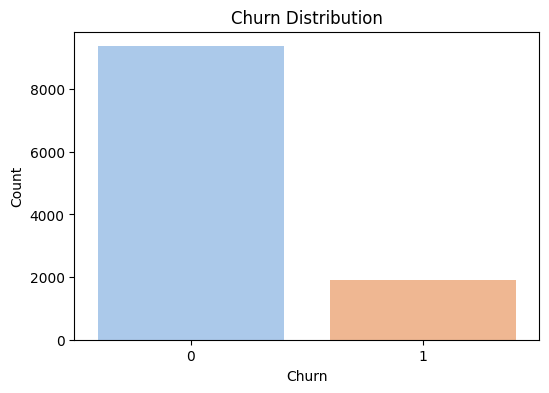

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [29]:
# Separate features and target
X = df.drop(columns=['AccountID', 'Login_device'])  # Dropping unnecessary columns
y = df['Churn']

# Check the shape of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


Shape of X: (11260, 18)
Shape of y: (11260,)


In [30]:
df_cleaned.shape

(11260, 17)

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [32]:
# Verifying the column names
print(df_cleaned.columns)


Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback'],
      dtype='object')


In [40]:
# Defining the Columns

numerical_cols = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
categorical_cols = ['City_Tier', 'Payment', 'Gender', 'account_segment', 'Marital_Status']


In [63]:
df_cleaned.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0        3.0              6.0   Debit Card  Female   
1      1     0.0        1.0              8.0          UPI    Male   
2      1     0.0        1.0             30.0   Debit Card    Male   
3      1     0.0        3.0             15.0   Debit Card    Male   
4      1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
2            2.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect  cashback  Cluster  
0                      1.0                   5.0     160.0        0  
1                      0.0                   0.0     121.0        0  
2                      0.0                   3.0     165.0        0  
3                      0.0                   3.0     134.0        0  
4                      1.0                   3.0     130.0        0

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64


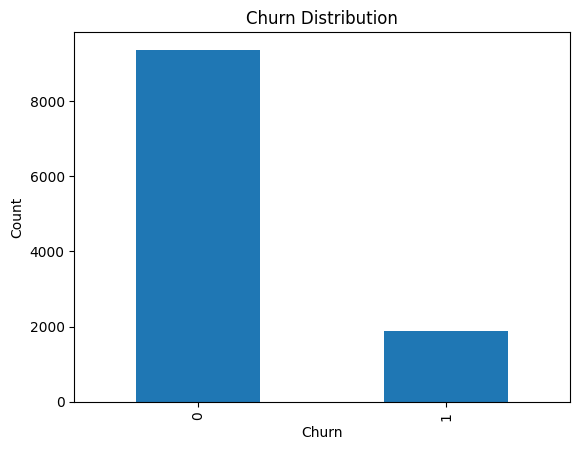

In [64]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Checking class distribution
print(df_cleaned['Churn'].value_counts(normalize=True))

# Visualizing class distribution
df_cleaned['Churn'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [65]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned['Churn']

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=numerical_cols + categorical_cols)
df_balanced['Churn'] = y_resampled

# Print the shape of the balanced dataset
print("Shape of balanced dataset:", df_balanced.shape)

# Check the distribution of the target variable
print(df_balanced['Churn'].value_counts(normalize=True))

Shape of balanced dataset: (3792, 16)
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [66]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_cleaned.drop('Churn', axis=1)
y = df_cleaned['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set shape: (7882, 17)
Test set shape: (3378, 17)

Class distribution in training set:
Churn
0    0.831642
1    0.168358
Name: proportion, dtype: float64

Class distribution in test set:
Churn
0    0.831557
1    0.168443
Name: proportion, dtype: float64


In [67]:
from IPython.display import display

In [80]:
Train, Test = train_test_split(df_cleaned, test_size=0.3, random_state=42, stratify=df_cleaned['Churn'])

In [81]:
display(Train.head())

print(Train.shape)

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment Gender  \
1813      0    25.0        1.0             12.0  Cash on Delivery   Male   
1586      0     5.0        3.0             32.0          E wallet   Male   
840       0     0.0        1.0             25.0       Credit Card   Male   
8939      0     7.0        3.0             14.0       Credit Card   Male   
6207      0     3.0        3.0             20.0               UPI   Male   

      Service_Score  Account_user_count account_segment  CC_Agent_Score  \
1813            3.0                 3.0           Super             5.0   
1586            3.0                 3.0           Super             1.0   
840             3.0                 3.0    Regular Plus             2.0   
8939            3.0                 2.0           Super             5.0   
6207            3.0                 3.0             HNI             3.0   

     Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
1813        Married            4.0          1.0            12.0   
1586        Married            1.0          0.0            18.0   
840        Divorced            4.0          0.0            11.0   
8939        Married            7.0          0.0            23.0   
6207        Married            9.0          0.0            12.0   

      coupon_used_for_payment  Day_Since_CC_connect  cashback  Cluster  
1813                      2.0                   9.0     156.0        2  
1586                      2.0                   2.0     145.0        1  
840                       1.0                   2.0     137.0        1  
8939                      1.0                   9.0     171.0        1  
6207                      4.0                   7.0     178.0        1

(7882, 18)


In [82]:
display(Test.head())

print(Test.shape)

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
2191      0     8.0        1.0              8.0        Debit Card    Male   
820       0    23.0        1.0             34.0        Debit Card  Female   
4224      0    10.0        1.0             15.0  Cash on Delivery  Female   
6703      0     6.0        3.0             25.0        Debit Card  Female   
4318      0    14.0        3.0             11.0          E wallet    Male   

      Service_Score  Account_user_count account_segment  CC_Agent_Score  \
2191            2.0                 4.0             HNI             4.0   
820             2.0                 3.0      Super Plus             5.0   
4224            3.0                 4.0             HNI             3.0   
6703            2.0                 3.0           Super             1.0   
4318            4.0                 5.0             HNI             1.0   

     Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
2191        Married            3.0          0.0            18.0   
820        Divorced            5.0          1.0            11.0   
4224        Married            3.0          0.0            14.0   
6703        Married            4.0          1.0            27.0   
4318        Married            9.0          0.0            12.0   

      coupon_used_for_payment  Day_Since_CC_connect  cashback  Cluster  
2191                      2.0                   4.0     203.0        1  
820                       0.0                   2.0     269.0        2  
4224                      8.0                   9.0     226.0        3  
6703                      0.0                   2.0     155.0        1  
4318                      2.0                  12.0     234.0        2

(3378, 18)


In [71]:
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned['Churn']

In [49]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


In [50]:
# Feature Selection with RFE

# Initializing Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initializing RFE with Random Forest
rfe = RFE(estimator=rf, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

# Selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features: ", selected_features)


Selected Features:  Index(['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'CC_Agent_Score',
       'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Marital_Status_Single'],
      dtype='object')


In [51]:
#Standardising the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rfe)


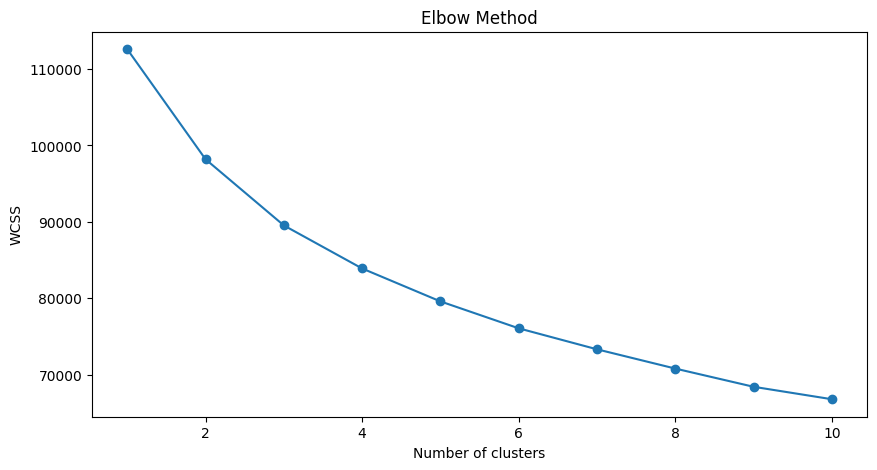

In [52]:
#determining the number of Cluters

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [54]:
# Applying the K-Means

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df_cleaned['Cluster'] = clusters


In [55]:
# Profiling the Clusters

# Group by cluster and calculate mean for numerical features
numerical_profile = df_cleaned.groupby('Cluster')[numerical_cols].mean()

# Add categorical features mode
categorical_profile = df_cleaned.groupby('Cluster')[categorical_cols].agg(lambda x: x.mode()[0])

# Combine numerical and categorical profiles
cluster_profile = pd.concat([numerical_profile, categorical_profile], axis=1)

print(cluster_profile)


            Tenure  CC_Contacted_LY  Service_Score  Account_user_count  \
Cluster                                                                  
0         6.526994        17.430164       2.832463            3.755138   
1         6.494120        18.054809       2.870853            3.562999   
2        20.563651        18.044208       2.977077            3.822759   
3        13.116554        17.310811       3.054054            3.911318   

         CC_Agent_Score  rev_per_month  rev_growth_yoy  \
Cluster                                                  
0              3.005573       4.942877       16.191919   
1              3.059639       4.721126       16.061319   
2              3.063037       6.739664       16.445354   
3              3.242399       5.055743       16.205236   

         coupon_used_for_payment  Day_Since_CC_connect    cashback  City_Tier  \
Cluster                                                                         
0                       1.225009            

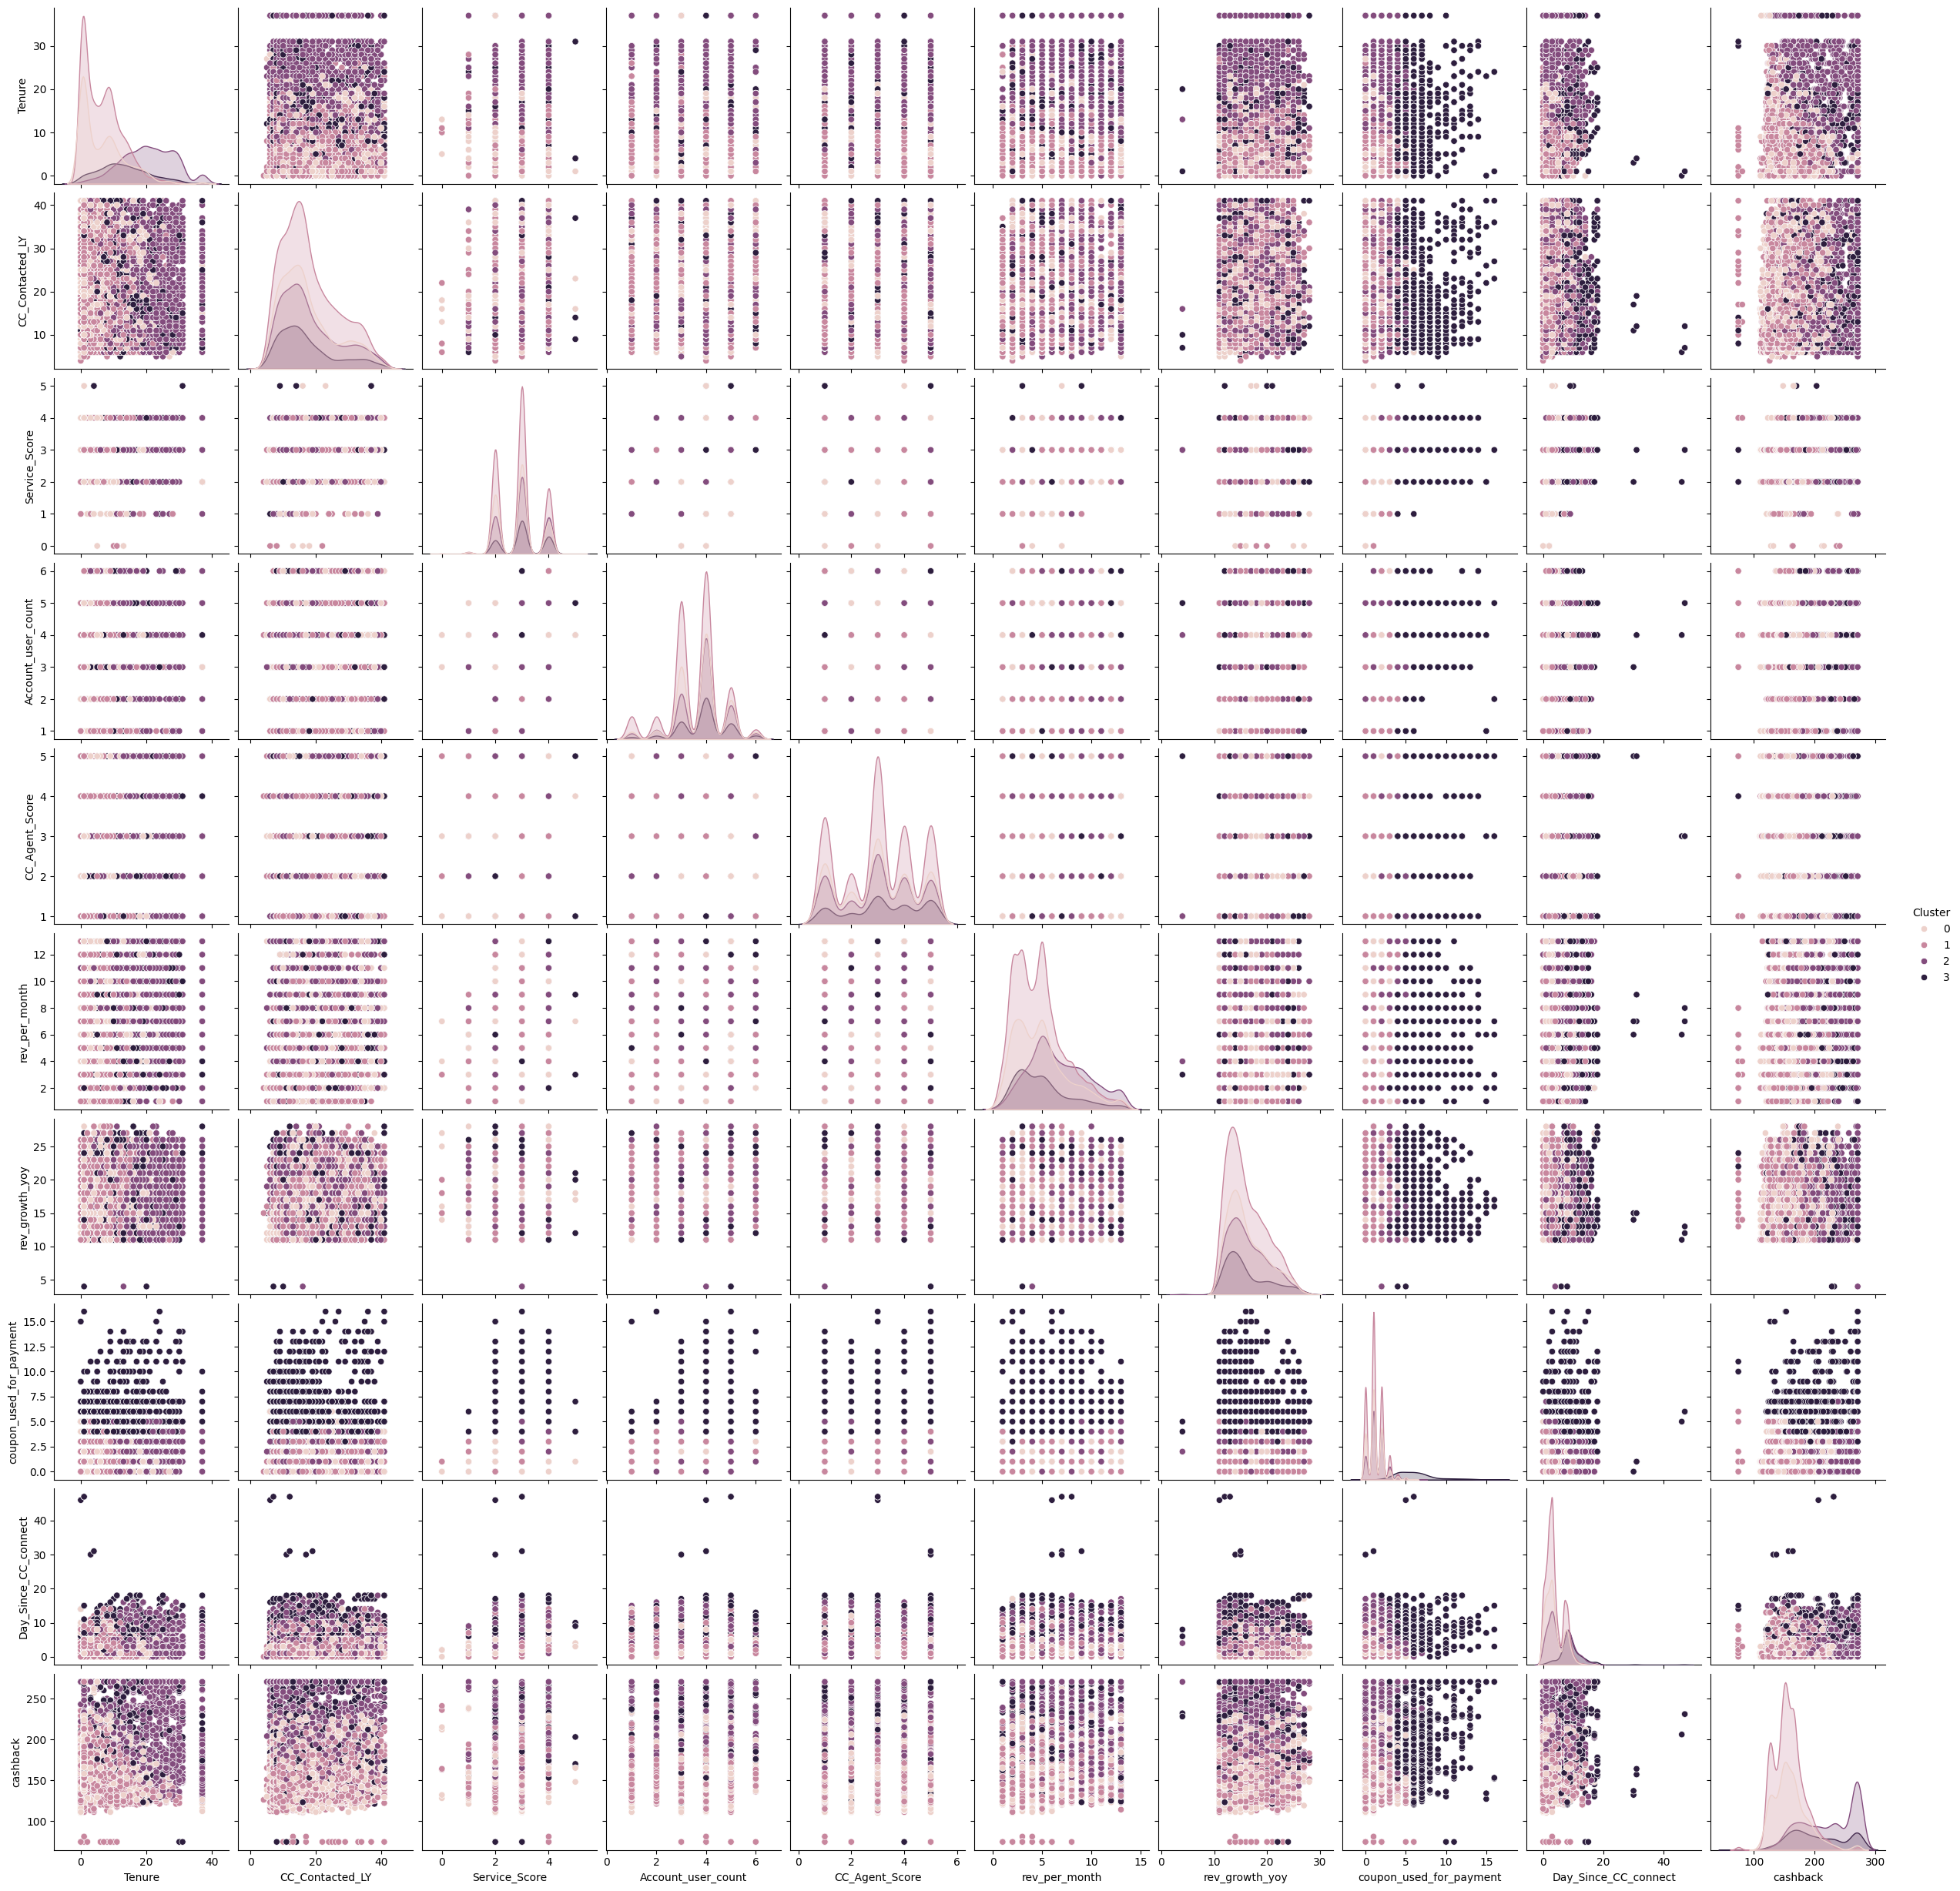

In [56]:
# visualization
sns.pairplot(df_cleaned, hue='Cluster', vars=numerical_cols)
plt.show()


**Customer Churn Notes-2**

In [77]:
# Balancing the data using SMOTE

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Separating features and target
X = df_cleaned[numerical_cols + categorical_cols]
y = df_cleaned['Churn']

# Creating preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ])

# Fitting and transforming the data with the preprocessor
X_preprocessed = preprocessor.fit_transform(X)

# Getting feature names after preprocessing
feature_names = (
    numerical_cols +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
)

# Applying SMOTE on the preprocessed data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Creating a new balanced dataframe
df_balanced = pd.DataFrame(X_resampled, columns=feature_names)
df_balanced['Churn'] = y_resampled

# Printing the shape of the balanced dataset
print("Shape of balanced dataset:", df_balanced.shape)

# Checking the distribution of the target variable
print(df_balanced['Churn'].value_counts(normalize=True))

Shape of balanced dataset: (18728, 28)
Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


In [79]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set shape: (13109, 27)
Test set shape: (5619, 27)

Class distribution in training set:
Churn
1    0.500038
0    0.499962
Name: proportion, dtype: float64

Class distribution in test set:
Churn
0    0.500089
1    0.499911
Name: proportion, dtype: float64


In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Your existing evaluate_model function
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred_proba = model.predict_proba(X)[:, 1]

    return {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1 Score': f1_score(y, y_pred),
        'AUC': roc_auc_score(y, y_pred_proba)
    }

# Modified build_and_evaluate_models function
def build_and_evaluate_models(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the preprocessing steps
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(drop='first', sparse=False)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(),
        'LDA': LinearDiscriminantAnalysis()
    }

    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)

        train_results = evaluate_model(pipeline, X_train, y_train)
        test_results = evaluate_model(pipeline, X_test, y_test)

        results[f"{name} (Train)"] = train_results
        results[f"{name} (Test)"] = test_results

    results_df = pd.DataFrame(results).T
    print(f"\nResults for {dataset_name}:")
    print(results_df)
    return results_df



In [103]:
# Run analysis on the cleaned dataset
X_cleaned = df_cleaned.drop('Churn', axis=1)
y_cleaned = df_cleaned['Churn']
results_cleaned = build_and_evaluate_models(X_cleaned, y_cleaned, "df_cleaned (Before SMOTE)")



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp


Results for df_cleaned (Before SMOTE):
                             Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression (Train)  0.869703   0.705279  0.368018  0.483660  0.855869
Logistic Regression (Test)   0.871818   0.746835  0.400679  0.521547  0.854532
Decision Tree (Train)        1.000000   1.000000  1.000000  1.000000  1.000000
Decision Tree (Test)         0.919775   0.770408  0.769100  0.769754  0.860348
Random Forest (Train)        1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest (Test)         0.953819   0.951983  0.774194  0.853933  0.983396
AdaBoost (Train)             0.882517   0.694190  0.521041  0.595280  0.899552
AdaBoost (Test)              0.887507   0.735892  0.553480  0.631783  0.888821
XGBoost (Train)              0.998731   0.998463  0.993879  0.996166  0.999993
XGBoost (Test)               0.948490   0.906067  0.786078  0.841818  0.980548
SVM (Train)                  0.924765   0.909404  0.606733  0.727857  0.938272
SVM (Test)  

In [104]:
# Find the best model for the cleaned dataset based on Test F1 Score
best_model_cleaned = results_cleaned.loc[[col for col in results_cleaned.index if 'Test' in col]]['F1 Score'].idxmax()
print(f"\nBest model for df_cleaned (Before SMOTE): {best_model_cleaned}")



Best model for df_cleaned (Before SMOTE): Random Forest (Test)


In [111]:
print(results_df.index)
print(results_df.columns)

Index(['Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost', 'SVM', 'KNN',
       'LDA'],
      dtype='object')
Index(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'CV Mean',
       'CV Std'],
      dtype='object')


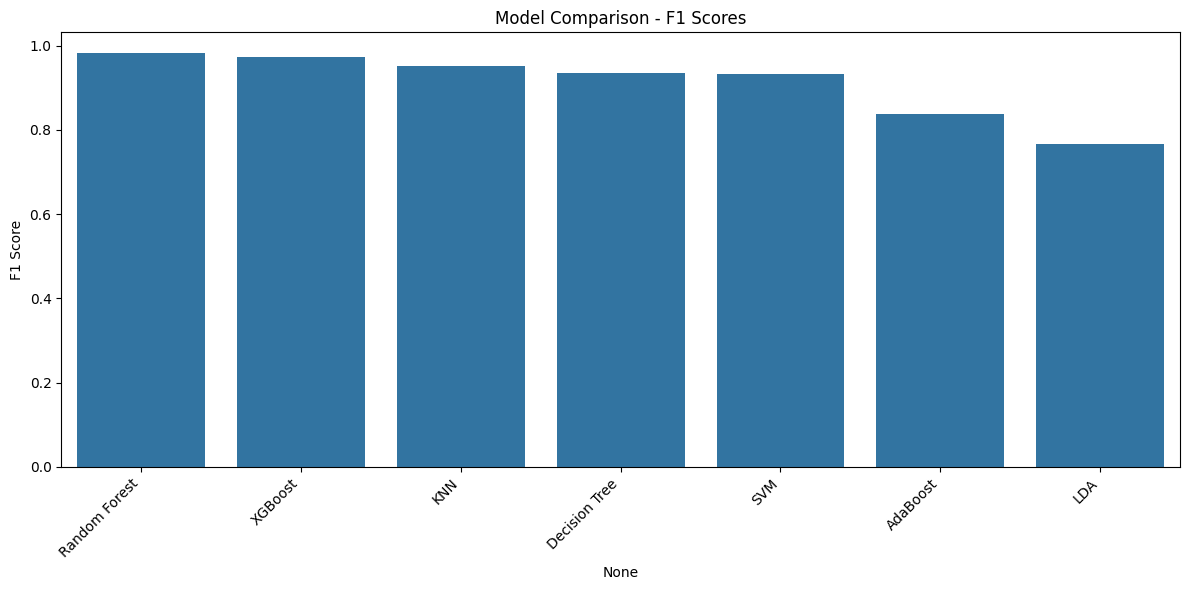

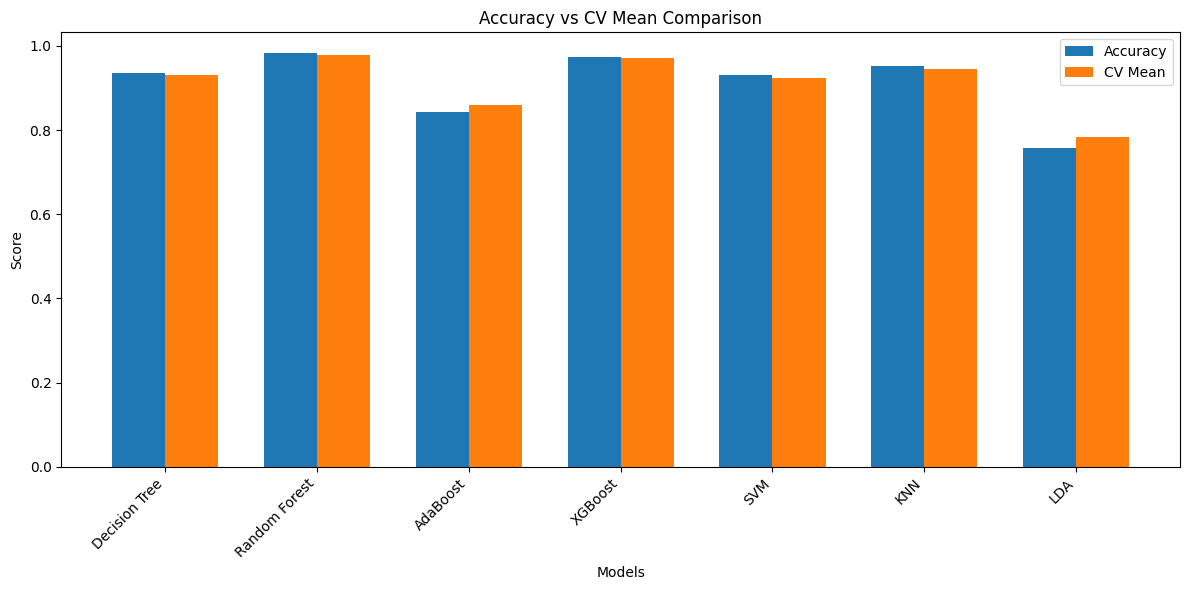

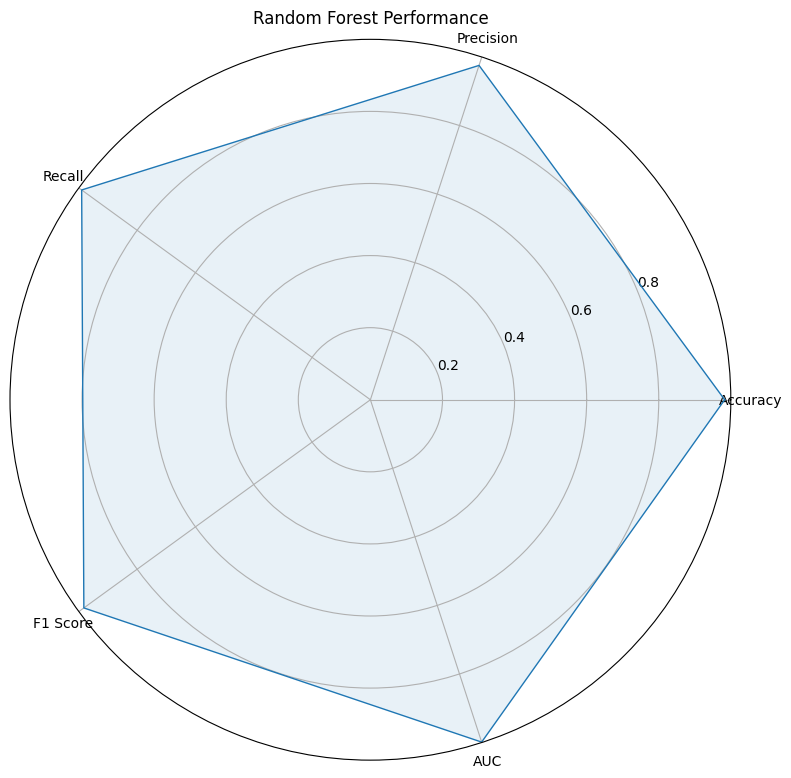

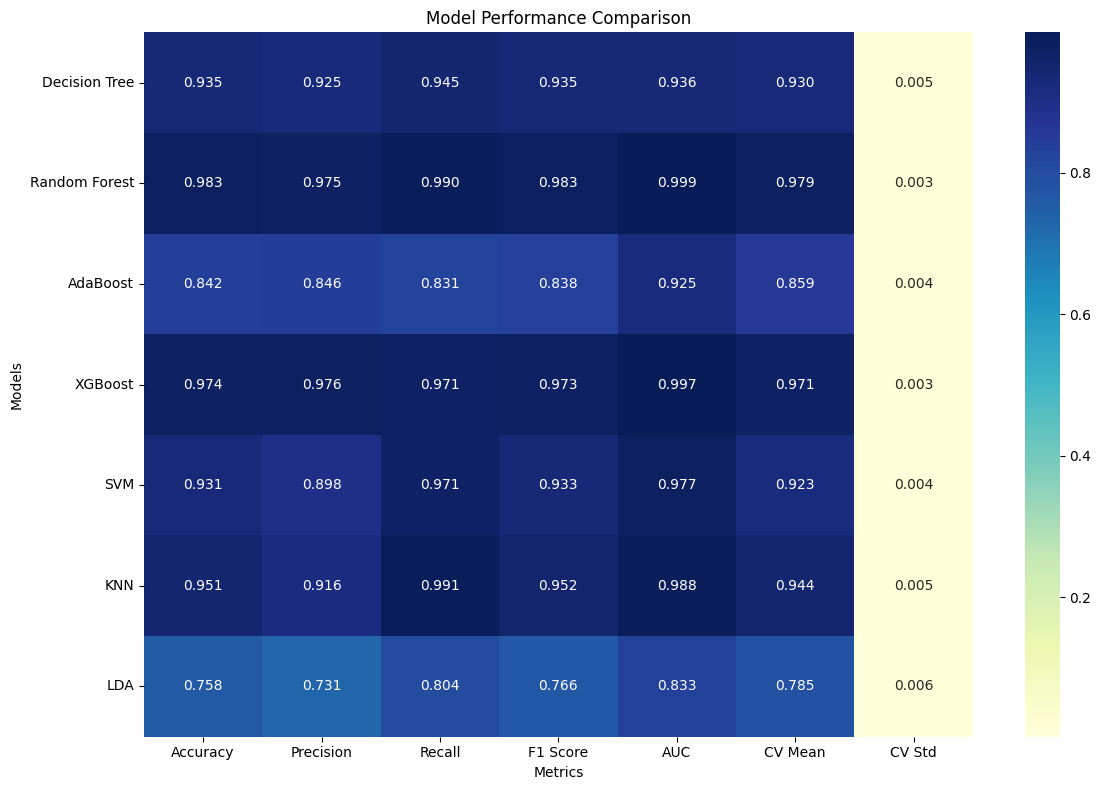

In [114]:
# Visualising the above

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Bar plot for F1 Scores
plt.figure(figsize=(12, 6))
f1_scores = results_df['F1 Score'].sort_values(ascending=False)
sns.barplot(x=f1_scores.index, y=f1_scores.values)
plt.title('Model Comparison - F1 Scores')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

# 2. Grouped bar plot for Accuracy and CV Mean
plt.figure(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.35
plt.bar(x - width/2, results_df['Accuracy'], width, label='Accuracy')
plt.bar(x + width/2, results_df['CV Mean'], width, label='CV Mean')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy vs CV Mean Comparison')
plt.xticks(x, results_df.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Radar chart for the best performing model
def radar_chart(data, title):
    categories = list(data.index)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)

    values = data.values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.1)

    plt.title(title)
    plt.tight_layout()
    plt.show()

# Find the best model based on F1 Score
best_model = results_df['F1 Score'].idxmax()
radar_chart(results_df.loc[best_model, ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']], f'{best_model} Performance')

# 4. Heatmap of all metrics for all models
plt.figure(figsize=(12, 8))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt='.3f')
plt.title("Model Performance Comparison")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()

In [97]:
print(df_balanced.columns)
print(df_balanced.shape)

Index(['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
       'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'City_Tier_2.0', 'City_Tier_3.0', 'Payment_Credit Card',
       'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI',
       'Gender_Female', 'Gender_M', 'Gender_Male', 'account_segment_Regular',
       'account_segment_Regular +', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super +',
       'account_segment_Super Plus', 'Marital_Status_Married',
       'Marital_Status_Single', 'Churn'],
      dtype='object')
(18728, 28)


In [90]:
numerical_cols = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count',
                  'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy',
                  'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']

encoded_categorical_cols = [col for col in df_balanced.columns if col not in numerical_cols and col != 'Churn']

print("Numerical columns:", numerical_cols)
print("Encoded categorical columns:", encoded_categorical_cols)

Numerical columns: ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
Encoded categorical columns: ['City_Tier_2.0', 'City_Tier_3.0', 'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet', 'Payment_UPI', 'Gender_Female', 'Gender_M', 'Gender_Male', 'account_segment_Regular', 'account_segment_Regular +', 'account_segment_Regular Plus', 'account_segment_Super', 'account_segment_Super +', 'account_segment_Super Plus', 'Marital_Status_Married', 'Marital_Status_Single']


In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def build_and_evaluate_models(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Define the preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_cols),
            ('cat', 'passthrough', encoded_categorical_cols)
        ])

    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(),
        'LDA': LinearDiscriminantAnalysis()
    }

    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        pipeline.fit(X_train, y_train)

        train_results = evaluate_model(pipeline, X_train, y_train)
        test_results = evaluate_model(pipeline, X_test, y_test)

        results[f"{name} (Train)"] = train_results
        results[f"{name} (Test)"] = test_results

    results_df1 = pd.DataFrame(results).T
    print(f"\nResults for {dataset_name}:")
    print(results_df1)
    return results_df1

In [93]:
# Run analysis on the balanced dataset
X_balanced = df_balanced.drop('Churn', axis=1)
y_balanced = df_balanced['Churn']
results_balanced = build_and_evaluate_models(X_balanced, y_balanced, "df_balanced (After SMOTE)")

# Find the best model for the balanced dataset based on Test F1 Score
best_model_balanced = results_balanced.loc[[col for col in results_balanced.index if 'Test' in col]]['F1 Score'].idxmax()
print(f"\nBest model for df_balanced (After SMOTE): {best_model_balanced}")


Results for df_balanced (After SMOTE):
                             Accuracy  Precision    Recall  F1 Score       AUC
Logistic Regression (Train)  0.790602   0.777405  0.813627  0.795103  0.862349
Logistic Regression (Test)   0.775405   0.763194  0.800568  0.781434  0.843783
Decision Tree (Train)        1.000000   1.000000  1.000000  1.000000  1.000000
Decision Tree (Test)         0.936999   0.931978  0.943222  0.937566  0.936981
Random Forest (Train)        1.000000   1.000000  1.000000  1.000000  1.000000
Random Forest (Test)         0.981669   0.975149  0.988644  0.981850  0.998491
AdaBoost (Train)             0.857197   0.864814  0.846318  0.855466  0.937225
AdaBoost (Test)              0.848372   0.864344  0.827537  0.845540  0.928308
XGBoost (Train)              0.998169   0.998929  0.997403  0.998165  0.999978
XGBoost (Test)               0.973839   0.977135  0.970546  0.973829  0.997295
SVM (Train)                  0.939583   0.911000  0.974183  0.941533  0.979716
SVM (Test)  

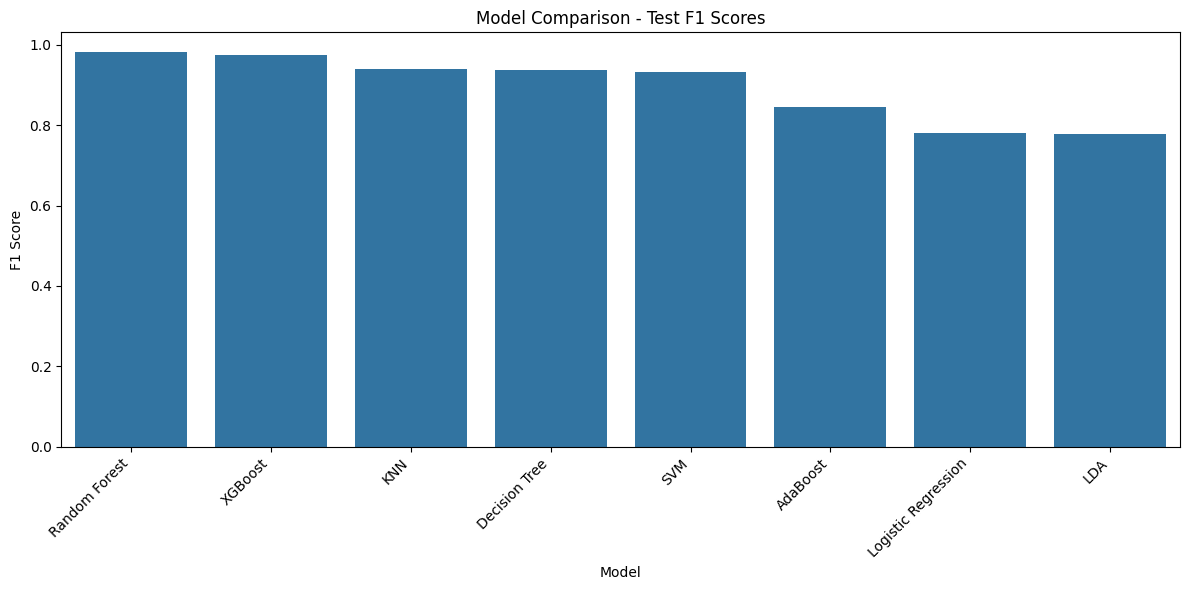

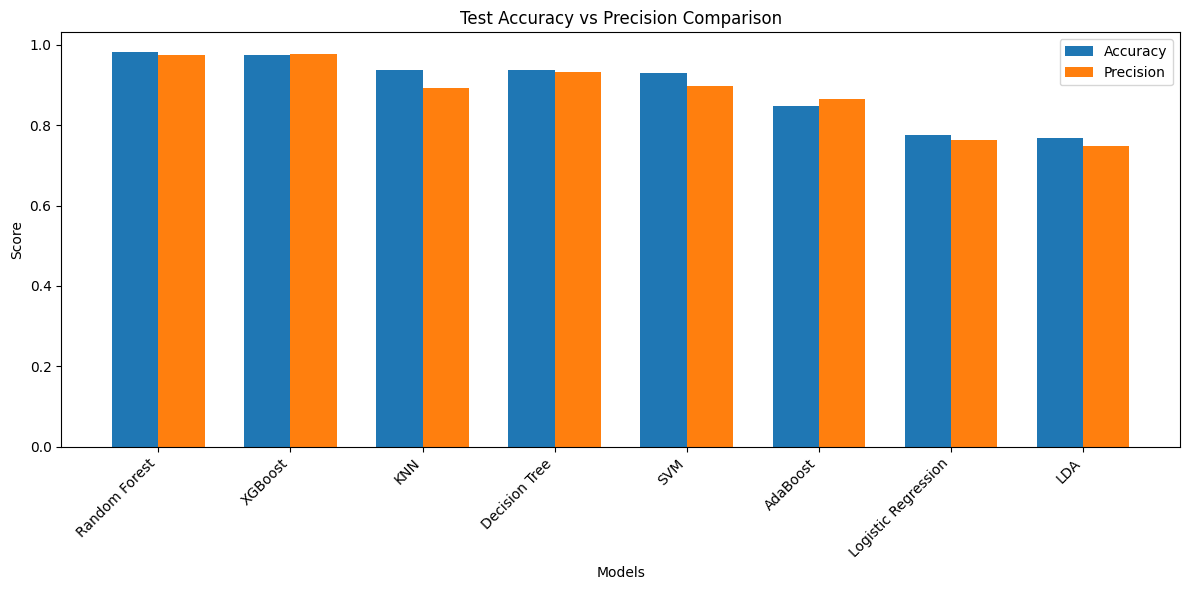

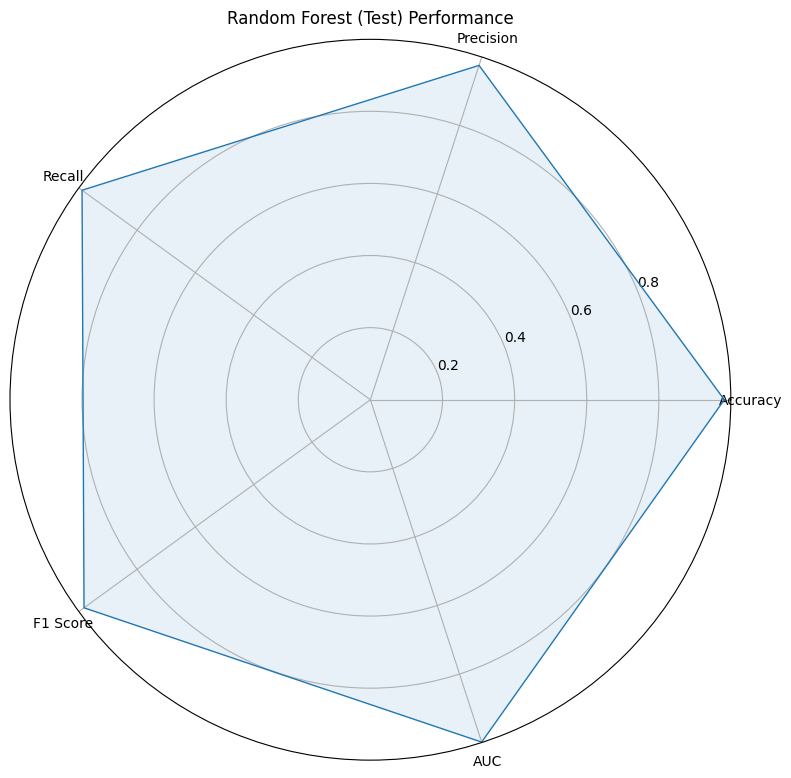

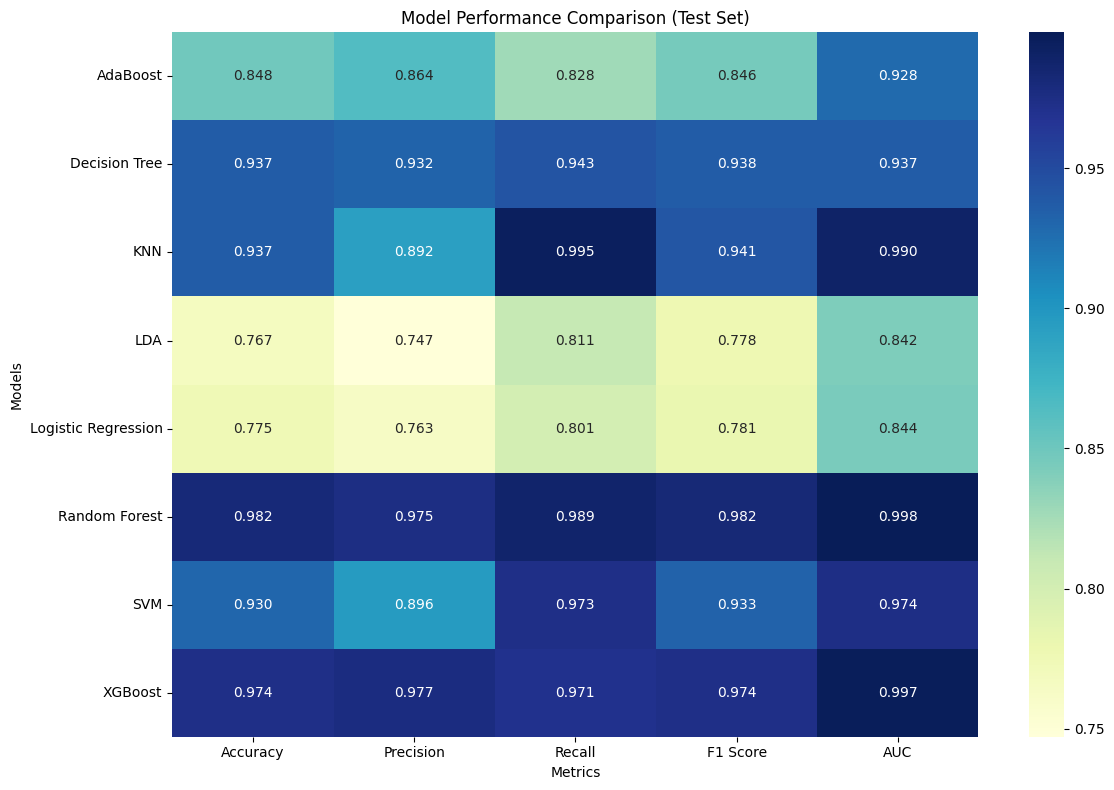

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Decision Tree', 'Decision Tree',
              'Random Forest', 'Random Forest', 'AdaBoost', 'AdaBoost', 'XGBoost', 'XGBoost',
              'SVM', 'SVM', 'KNN', 'KNN', 'LDA', 'LDA'],
    'Set': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test',
            'Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'Accuracy': [0.790602, 0.775405, 1.000000, 0.936999, 1.000000, 0.981669, 0.857197, 0.848372,
                 0.998169, 0.973839, 0.939583, 0.929881, 0.968342, 0.937355, 0.784652, 0.767396],
    'Precision': [0.777405, 0.763194, 1.000000, 0.931978, 1.000000, 0.975149, 0.864814, 0.864344,
                  0.998929, 0.977135, 0.911000, 0.896078, 0.941524, 0.892176, 0.763110, 0.747138],
    'Recall': [0.813627, 0.800568, 1.000000, 0.943222, 1.000000, 0.988644, 0.846318, 0.827537,
               0.997403, 0.970546, 0.974183, 0.973031, 0.998625, 0.995387, 0.824778, 0.810504],
    'F1 Score': [0.795103, 0.781434, 1.000000, 0.937566, 1.000000, 0.981850, 0.855466, 0.845540,
                 0.998165, 0.973829, 0.941533, 0.932970, 0.969234, 0.940959, 0.792746, 0.777532],
    'AUC': [0.862349, 0.843783, 1.000000, 0.936981, 1.000000, 0.998491, 0.937225, 0.928308,
            0.999978, 0.997295, 0.979716, 0.974199, 0.999572, 0.990076, 0.860792, 0.841920]
}

results_df1 = pd.DataFrame(data)

# 1. Bar plot for Test F1 Scores
plt.figure(figsize=(12, 6))
test_f1 = results_df1[results_df1['Set'] == 'Test'].sort_values('F1 Score', ascending=False)
sns.barplot(x='Model', y='F1 Score', data=test_f1)
plt.title('Model Comparison - Test F1 Scores')
plt.xticks(rotation=45, ha='right')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()

# 2. Grouped bar plot for Test Accuracy and Precision
plt.figure(figsize=(12, 6))
test_data = results_df1[results_df1['Set'] == 'Test'].sort_values('Accuracy', ascending=False)
x = np.arange(len(test_data))
width = 0.35
plt.bar(x - width/2, test_data['Accuracy'], width, label='Accuracy')
plt.bar(x + width/2, test_data['Precision'], width, label='Precision')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Test Accuracy vs Precision Comparison')
plt.xticks(x, test_data['Model'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Radar chart for the best performing model (Random Forest - Test)
def radar_chart(data, title):
    categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)

    values = data[categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.1)

    plt.title(title)
    plt.tight_layout()
    plt.show()

best_model = results_df1[(results_df1['Model'] == 'Random Forest') & (results_df1['Set'] == 'Test')]
radar_chart(best_model, 'Random Forest (Test) Performance')

# 4. Heatmap of all metrics for all models (Test set)
plt.figure(figsize=(12, 8))
test_data_pivot = results_df1[results_df1['Set'] == 'Test'].pivot(index='Model', columns='Set', values=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
test_data_pivot.columns = test_data_pivot.columns.droplevel(1)
sns.heatmap(test_data_pivot, annot=True, cmap="YlGnBu", fmt='.3f')
plt.title("Model Performance Comparison (Test Set)")
plt.ylabel("Models")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()


Evaluating Decision Tree...
Decision Tree Performance:
Accuracy: 0.9354
Precision: 0.9250
Recall: 0.9451
F1 Score: 0.9349
AUC: 0.9356


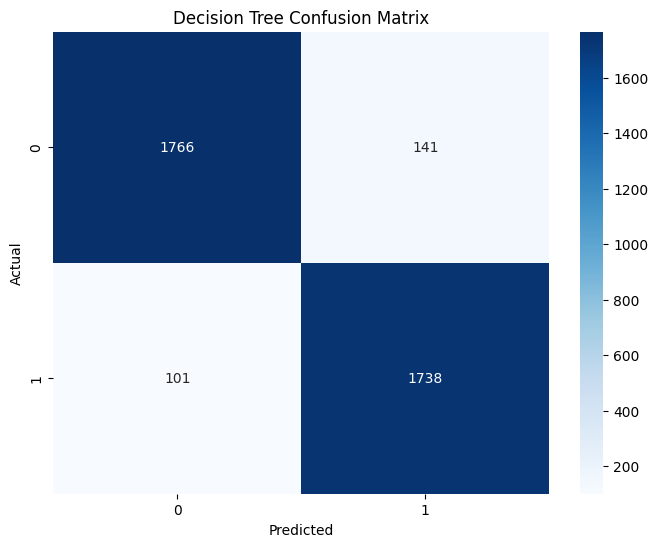


Evaluating Random Forest...
Random Forest Performance:
Accuracy: 0.9829
Precision: 0.9754
Recall: 0.9902
F1 Score: 0.9827
AUC: 0.9988


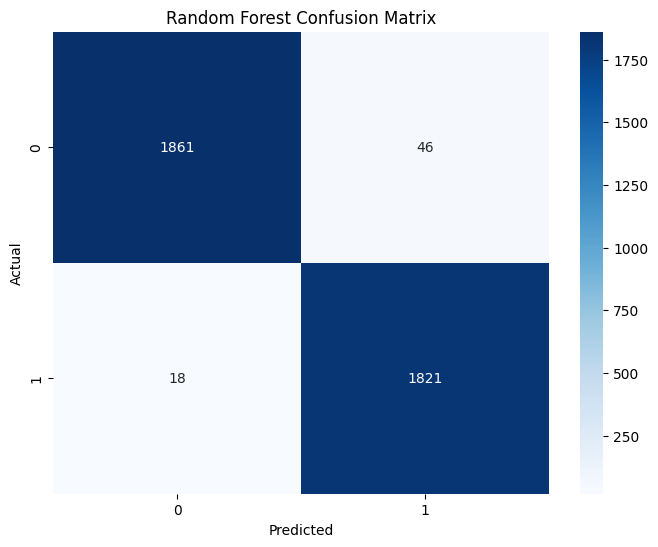


Evaluating AdaBoost...
AdaBoost Performance:
Accuracy: 0.8425
Precision: 0.8456
Recall: 0.8309
F1 Score: 0.8382
AUC: 0.9246


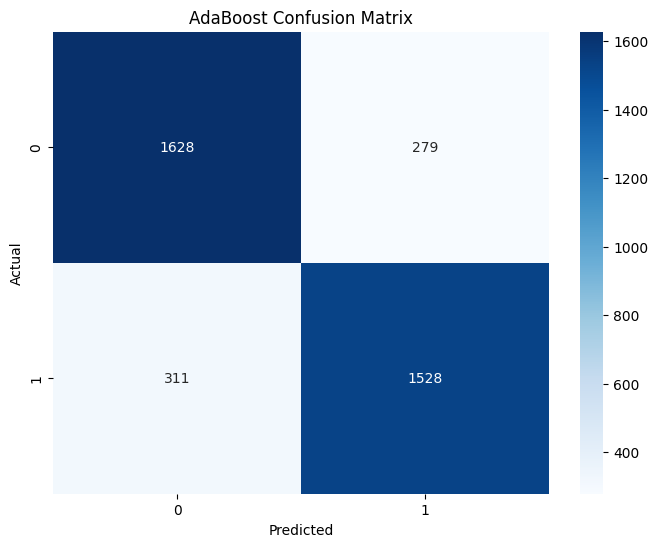


Evaluating XGBoost...
XGBoost Performance:
Accuracy: 0.9738
Precision: 0.9759
Recall: 0.9706
F1 Score: 0.9733
AUC: 0.9966


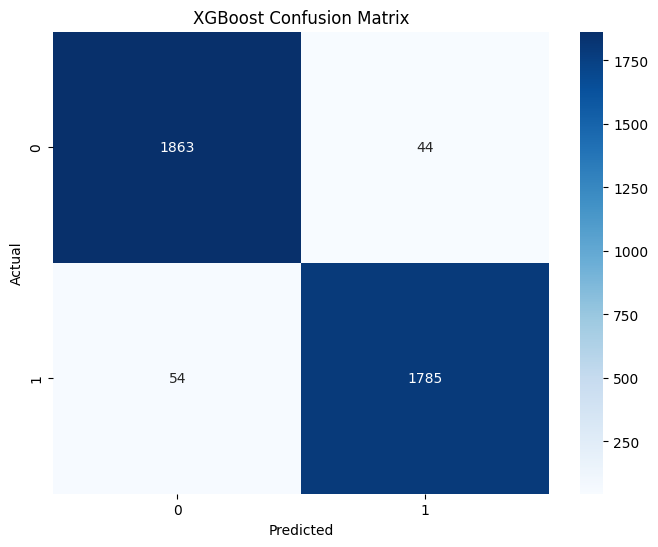


Evaluating SVM...
SVM Performance:
Accuracy: 0.9314
Precision: 0.8979
Recall: 0.9706
F1 Score: 0.9328
AUC: 0.9769


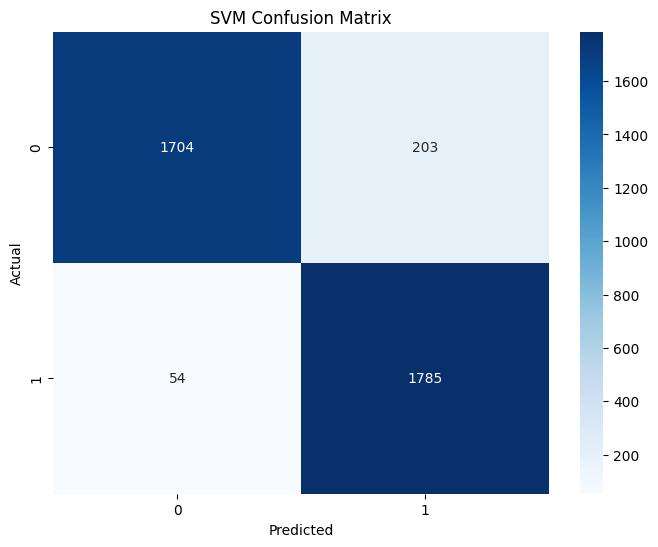


Evaluating KNN...
KNN Performance:
Accuracy: 0.9511
Precision: 0.9161
Recall: 0.9913
F1 Score: 0.9522
AUC: 0.9884


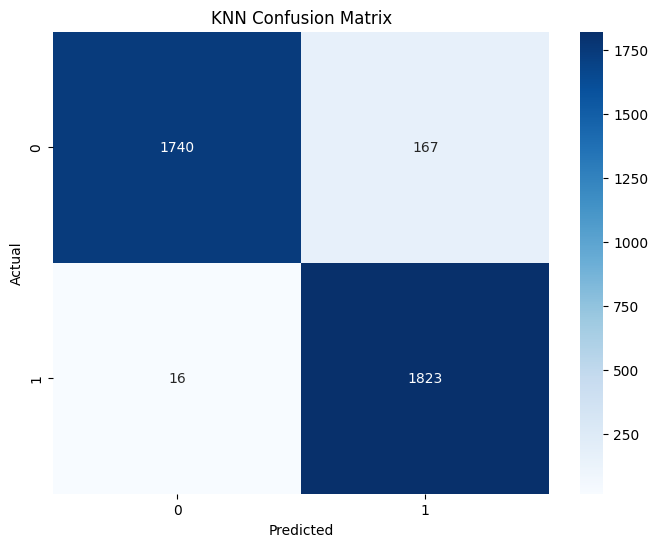


Evaluating LDA...
LDA Performance:
Accuracy: 0.7584
Precision: 0.7310
Recall: 0.8037
F1 Score: 0.7656
AUC: 0.8329


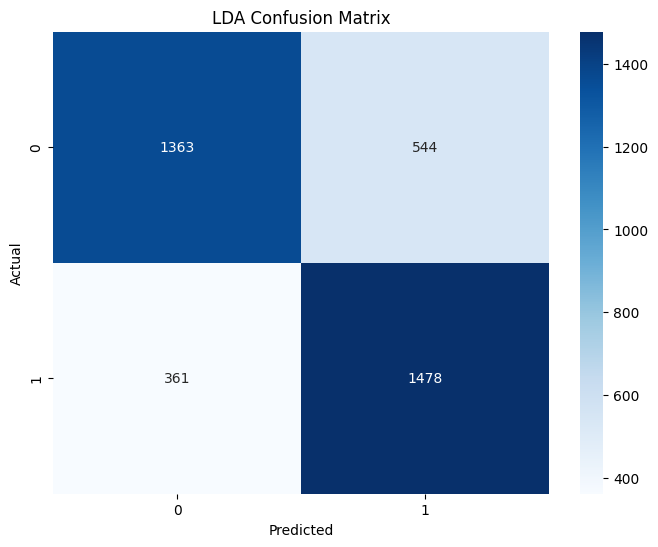


Model Performance Comparison:
               Accuracy  Precision    Recall  F1 Score       AUC
Model                                                           
Decision Tree  0.935398   0.924960  0.945079  0.934911  0.935570
Random Forest  0.982915   0.975362  0.990212  0.982731  0.998774
AdaBoost       0.842499   0.845600  0.830886  0.838179  0.924595
XGBoost        0.973839   0.975943  0.970636  0.973282  0.996578
SVM            0.931393   0.897887  0.970636  0.932846  0.976857
KNN            0.951148   0.916080  0.991300  0.952207  0.988409
LDA            0.758409   0.730959  0.803698  0.765605  0.832890


<Figure size 1200x600 with 0 Axes>

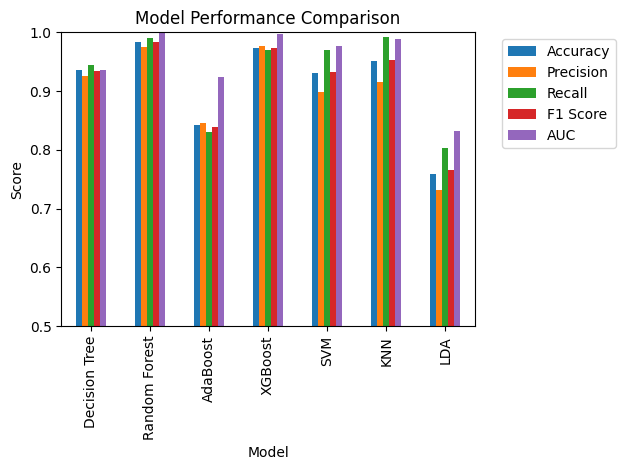


Best performing model based on F1 Score: Random Forest


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Preparing the data
X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis()
}

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }

# Evaluate all models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results.append(result)

# Create a DataFrame with the results
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

# Displaying the results
print("\nModel Performance Comparison:")
print(results_df)

# Visualizing the results
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar', ylim=(0.5, 1.0))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Finding the best model based on F1 Score
best_model = results_df['F1 Score'].idxmax()
print(f"\nBest performing model based on F1 Score: {best_model}")

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Ensemble Model Performance:
Accuracy: 0.9784
Precision: 0.9736
Recall: 0.9826
F1 Score: 0.9781
AUC: 0.9982


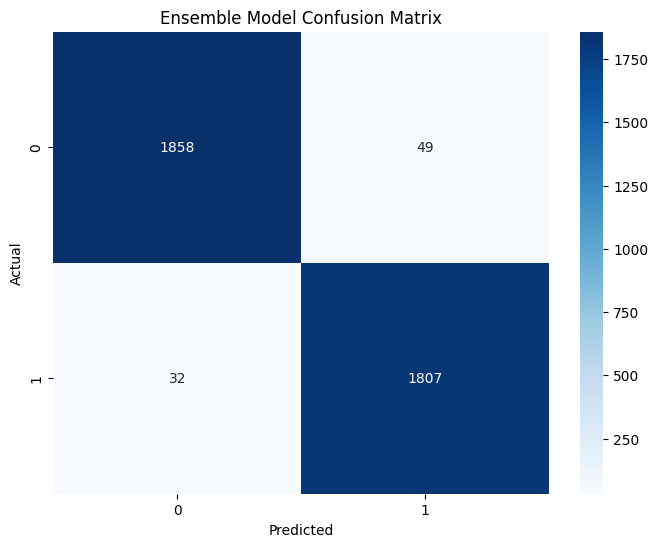

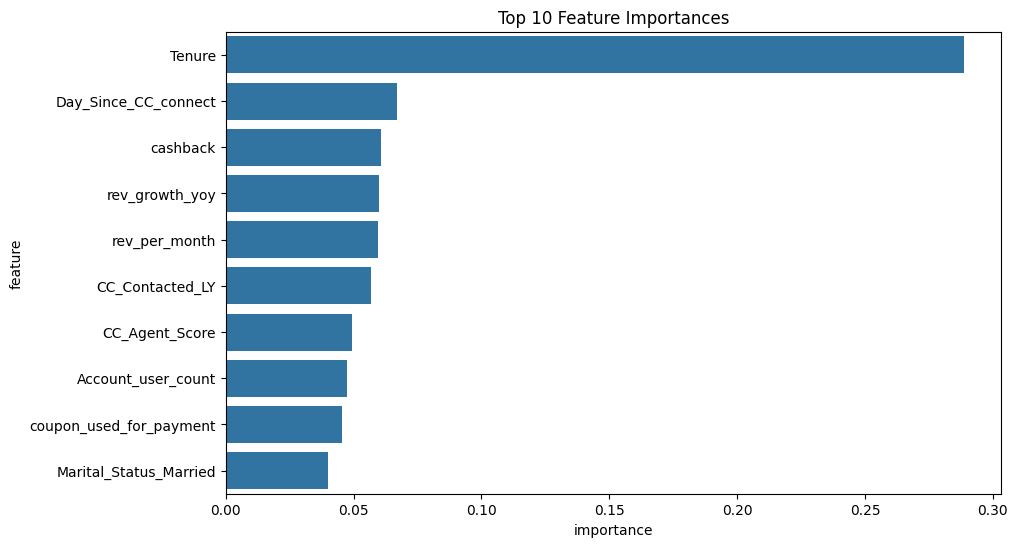

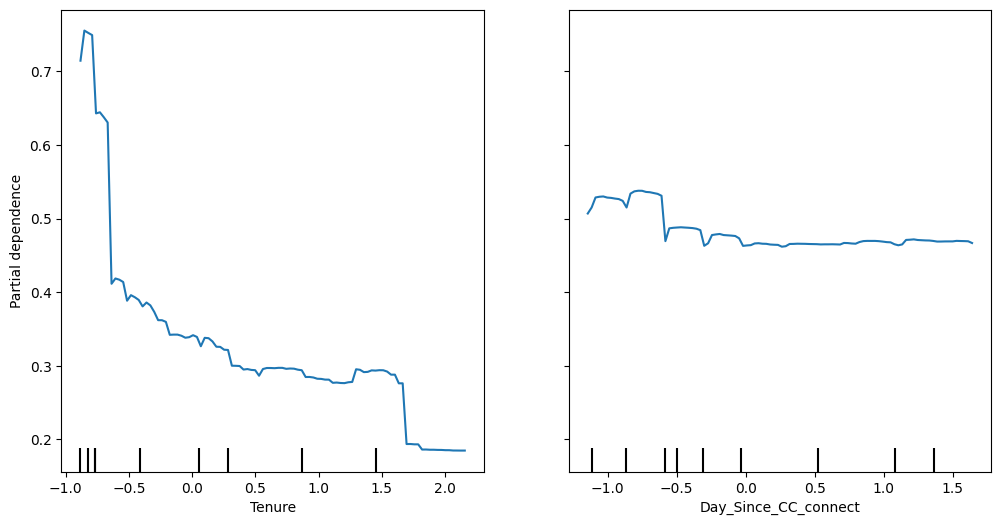

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay

# Data prepare
X = df_balanced.drop('Churn', axis=1)
y = df_balanced['Churn']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tune Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
rf_best = rf_grid_search.best_estimator_

# Tune XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(XGBClassifier(random_state=42), xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid_search.fit(X_train_scaled, y_train)

print("Best XGBoost Parameters:", xgb_grid_search.best_params_)
xgb_best = xgb_grid_search.best_estimator_

# Create Ensemble
ensemble = VotingClassifier(
    estimators=[('rf', rf_best), ('xgb', xgb_best)],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)

# Evaluate Ensemble
y_pred = ensemble.predict(X_test_scaled)
y_pred_proba = ensemble.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("\nEnsemble Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Ensemble Model Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

# Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(ensemble, X_train_scaled,
                                        [feature_importance['feature'].iloc[0], feature_importance['feature'].iloc[1]],
                                        ax=ax, feature_names=X.columns)
plt.show()